In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from numpy.random import seed

In [2]:
# definição da seed do python
seed(1)
# e seed do tensorflow
tf.random.set_seed(2)

In [3]:
# definição do ficheiro de dados (treino/validação)
# symbol = 'ada'
crypto_ta_dataset_fp = "datasets/crypto_ta_btc_04.csv"

In [4]:
# Nomes das classses
# class_names = ['Very Low', 'Low', 'High', 'Very High']
class_names = ['Very Low', 'Low', 'Very High', 'High', 'Neutral']

In [5]:
# ler o ficheiro de dados, indicando o ficheiro e indicamos os nomes das colunas (que não estão no ficheiro)
crypto_ta_dataset = pd.read_csv(crypto_ta_dataset_fp)
# remover as colunas que nao interessam
# crypto_ta_dataset.drop('ema_25', axis=1, inplace=True)
# crypto_ta_dataset.drop('ema_30', axis=1, inplace=True)
# crypto_ta_dataset.drop('ema_35', axis=1, inplace=True)
crypto_ta_dataset.drop('macd', axis=1, inplace=True)
crypto_ta_dataset.drop('macdsignal', axis=1, inplace=True)
crypto_ta_dataset.drop('macdhist', axis=1, inplace=True)
# imprime um as primeiras linhas dos dados
print(crypto_ta_dataset.head())

# colunas que são features e coluna que é a label (a ultima neste caso)
feature_names = crypto_ta_dataset.columns[:-1]
label_name = crypto_ta_dataset.columns[-1]

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))

    sma_200     ema_8    ema_20    ema_25    ema_30    ema_35    ema_40  \
0  0.255202 -0.409322  0.096394  0.133747  0.149948  0.156290  0.157773   
1  0.257581 -0.093549  0.186353  0.203982  0.208116  0.206254  0.201748   
2  0.268577  0.281311  0.323255  0.313902  0.300544  0.286328  0.272576   
3  0.251986 -0.207606  0.105288  0.137413  0.152578  0.159120  0.161111   
4  0.253124  0.069138  0.195859  0.208523  0.211550  0.209772  0.205674   

     ema_45    ema_50   sma_vol       roc        cmo       ppo   linearreg  \
0  0.156829  0.154781  4.110956 -4.930363  11.508362  2.970577  462.048771   
1  0.196209  0.190500  4.050205  1.032400  16.962188  3.053514  461.049000   
2  0.259821  0.248303 -0.546236  1.598866  24.774405  3.250285  461.917400   
3  0.160681  0.159050  0.473048 -1.897426  11.191402  3.361591  459.937457   
4  0.200571  0.195222 -1.599098  1.046878  16.490509  3.398493  458.262343   

          tsf    trend  
0  464.956484  NEUTRAL  
1  463.534231  NEUTRAL  
2  46

In [6]:
crypto_ta_dataset[label_name] = crypto_ta_dataset[label_name].map(
    {"VLOW":0,"LOW":1,"VHIGH":2,"HIGH":3,"NEUTRAL":4})

# print(crypto_ta_dataset)
# criamos duas variáveis, uma para os dados e outra para as labels (vamos precisar depois)
features = crypto_ta_dataset.copy()
labels = features.pop(label_name)
# normalization dataset
# features = tf.keras.utils.normalize(features, axis=-1, order=2)

# imprime um resumo dos valores
print(features)

        sma_200     ema_8    ema_20    ema_25    ema_30    ema_35    ema_40  \
0      0.255202 -0.409322  0.096394  0.133747  0.149948  0.156290  0.157773   
1      0.257581 -0.093549  0.186353  0.203982  0.208116  0.206254  0.201748   
2      0.268577  0.281311  0.323255  0.313902  0.300544  0.286328  0.272576   
3      0.251986 -0.207606  0.105288  0.137413  0.152578  0.159120  0.161111   
4      0.253124  0.069138  0.195859  0.208523  0.211550  0.209772  0.205674   
...         ...       ...       ...       ...       ...       ...       ...   
22699  0.032951  0.045498  0.045542  0.049875  0.052914  0.054778  0.055799   
22700  0.035429  0.116512  0.076056  0.074226  0.073174  0.072148  0.071024   
22701  0.036673  0.156520  0.097136  0.091423  0.087691  0.084726  0.082141   
22702  0.039982  0.306922  0.167543  0.148832  0.136167  0.126706  0.119189   
22703  0.040570  0.338862  0.194787  0.172344  0.156756  0.145004  0.135657   

         ema_45    ema_50   sma_vol       roc      

In [7]:
# sns_plot = sns.pairplot(crypto_ta_dataset,hue=label_name,palette='Set2')
# sns_plot.savefig("df4.png")

In [8]:
# definir a estrutra a rede neuronal a utilizar
# Neste caso temos duas camadas escondidas com 10 nós
#     - Ativação do tipo relu (podem usar outras mas podem também escolher manter)
#     - Dense significa que cada camada liga a todas as outras (recomendado)
#     - Na primeira camada escondida indica-se, no parametro input_shape, que temos  entradas
# A camada de saída deve ter o mesmo número de saídas que o número de classes
#     - Por default a camada de saída devolve um logit para cada classe.
#     - Um logit é um numero entre -Inf e +Inf que representa a classificação antes de ser normalizada
#     - Podemos normalizar o resultado depois  para probalidades (usando a função softmax)
#     - Podemos também indicar que esta camada usa logo a softmax mas não é recomendado
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=tf.nn.relu, input_shape=(15,)),  # input shape required
    tf.keras.layers.Dense(100, activation=tf.nn.relu),
    tf.keras.layers.Dense(100, activation=tf.nn.relu),
    tf.keras.layers.Dense(100, activation=tf.nn.relu),
    tf.keras.layers.Dense(100, activation=tf.nn.relu),
    tf.keras.layers.Dense(100, activation=tf.nn.relu),
    tf.keras.layers.Dense(100, activation=tf.nn.relu),
    tf.keras.layers.Dense(5)
])


In [9]:
# definir as configurações do algoritmo
# - Algoritmo usado para optimização (neste caso o SGD) com a learning rate 
#    - Podem decidir ajustar este parametro mas não é obrigatório
# - Função que será usada para a minimização na procura
#    - Neste caso usamos a SparseCategoricalCrossentropy
#    - SparseCategorical é usada quanda trabalhamos com inteiros como target
#    - from_logits=True indica que a saída da rede são logits
#        - Se não usarmos este parametro temos de usar a softmax na saída da rede
# - As metricas não são usadas para optimização, são usadas para dar output de resultados
#    - Podem-se usar várias métricas ao mesmo tempo, dará vários valores de output
#    - Neste caso estamos a usar a Accuracy (número )

# definir as configurações do algoritmo

model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001),  # Optimizer
    # Loss function to minimize
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    # List of metrics to monitor
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

In [10]:
# 1- Criar o Dataset
dataset = tf.data.Dataset.from_tensor_slices((features, labels))

# Percentages de teste e validação
TEST_PERC = 0.1
VALID_PERC = 0.1

In [11]:
# 2- Separar por classe (vai permitir garantir que cada conjunto tem X de cada classe)
class0_dataset = dataset.filter(lambda x, y: y == 0)
class1_dataset = dataset.filter(lambda x, y: y == 1)
class2_dataset = dataset.filter(lambda x, y: y == 2)
class3_dataset = dataset.filter(lambda x, y: y == 3)
class4_dataset = dataset.filter(lambda x, y: y == 4)
print(class0_dataset.cardinality())
# quantidade de cada classe e total
DATASIZE = dataset.cardinality().numpy()
c0_size = len(list(class0_dataset))
c1_size = len(list(class1_dataset))
c2_size = len(list(class2_dataset))
c3_size = len(list(class3_dataset))
c4_size = len(list(class4_dataset))
print(DATASIZE,c0_size,c1_size,c2_size,c3_size,c4_size)

tf.Tensor(-2, shape=(), dtype=int64)
22704 357 1750 441 1987 18169


In [12]:
# 3- Baralhar
class0_dataset = class0_dataset.shuffle(DATASIZE)
class1_dataset = class1_dataset.shuffle(DATASIZE)
class2_dataset = class2_dataset.shuffle(DATASIZE)
class3_dataset = class3_dataset.shuffle(DATASIZE)
class4_dataset = class4_dataset.shuffle(DATASIZE)


In [13]:
# 4- Partir cada um
# Primeiro retiramos o teste
class0_test = class0_dataset.take(int(c0_size*TEST_PERC))
# variável temporária para separar entre treino e validação
# skip significa que vai ficar com o resto dos dados
rest = class0_dataset.skip(int(c0_size*TEST_PERC))
class0_validation = rest.take(int(c0_size*VALID_PERC))
class0_train = rest.skip(int(c0_size*VALID_PERC))

class1_test = class1_dataset.take(int(c1_size*TEST_PERC))
rest = class1_dataset.skip(int(c1_size*TEST_PERC))
class1_validation = rest.take(int(c1_size*VALID_PERC))
class1_train = rest.skip(int(c1_size*VALID_PERC))

class2_test = class2_dataset.take(int(c2_size*TEST_PERC))
rest = class2_dataset.skip(int(c2_size*TEST_PERC))
class2_validation = rest.take(int(c2_size*VALID_PERC))
class2_train = rest.skip(int(c2_size*VALID_PERC))

class3_test = class3_dataset.take(int(c3_size*TEST_PERC))
rest = class3_dataset.skip(int(c3_size*TEST_PERC))
class3_validation = rest.take(int(c3_size*VALID_PERC))
class3_train = rest.skip(int(c3_size*VALID_PERC))

class4_test = class4_dataset.take(int(c4_size*TEST_PERC))
rest = class4_dataset.skip(int(c4_size*TEST_PERC))
class4_validation = rest.take(int(c4_size*VALID_PERC))
class4_train = rest.skip(int(c4_size*VALID_PERC))

In [14]:
#5- Juntar tudo novamente
train_dataset = class0_train.concatenate(class1_train).concatenate(class2_train).concatenate(class3_train).concatenate(class4_train).shuffle(DATASIZE)
test_dataset = class0_test.concatenate(class1_test).concatenate(class2_test).concatenate(class3_test).concatenate(class4_test).shuffle(DATASIZE)
validation_dataset = class0_validation.concatenate(class1_validation).concatenate(class2_validation).concatenate(class3_validation).concatenate(class4_validation).shuffle(DATASIZE)

#confirmar tamanhos
print('Train dataset size = ', len(list(train_dataset)))
print('Validation dataset size = ', len(list(validation_dataset)))
print('Test dataset size = ', len(list(test_dataset)))

Train dataset size =  18168
Validation dataset size =  2268
Test dataset size =  2268


In [15]:
#6- Usar o dataset diretamente para treinar, validar e testar

# Converter o conjunto de treino de novo para o formato inicial (DataFrame)
feat,lab = map(list,zip(*list(train_dataset.as_numpy_iterator())))
train_features= pd.DataFrame(data=feat,columns=feature_names)
train_labels = pd.DataFrame(data=lab,columns=[label_name])

feat,lab = map(list,zip(*list(validation_dataset.as_numpy_iterator())))
valid_features= pd.DataFrame(data=feat,columns=feature_names)
valid_labels = pd.DataFrame(data=lab,columns=[label_name])

feat,lab = map(list,zip(*list(test_dataset.as_numpy_iterator())))
test_features= pd.DataFrame(data=feat,columns=feature_names)
test_labels = pd.DataFrame(data=lab,columns=[label_name])

In [16]:
# Correr o treino, indica as features as labels e o número de épocas
history = model.fit(train_features, train_labels, epochs=100,validation_data=(valid_features,valid_labels))
print(history)

Epoch 1/100
568/568 [==============================] - 1s 2ms/step - loss: 12.3845 - sparse_categorical_accuracy: 0.7359 - val_loss: 1.1343 - val_sparse_categorical_accuracy: 0.8007
Epoch 2/100
568/568 [==============================] - 1s 1ms/step - loss: 1.1051 - sparse_categorical_accuracy: 0.7963 - val_loss: 1.1551 - val_sparse_categorical_accuracy: 0.8007
Epoch 3/100
568/568 [==============================] - 1s 1ms/step - loss: 1.0951 - sparse_categorical_accuracy: 0.7979 - val_loss: 1.1115 - val_sparse_categorical_accuracy: 0.8007
Epoch 4/100
568/568 [==============================] - 1s 1ms/step - loss: 1.0802 - sparse_categorical_accuracy: 0.8001 - val_loss: 1.1301 - val_sparse_categorical_accuracy: 0.8007
Epoch 5/100
568/568 [==============================] - 1s 1ms/step - loss: 1.0728 - sparse_categorical_accuracy: 0.8001 - val_loss: 1.0898 - val_sparse_categorical_accuracy: 0.8007
Epoch 6/100
568/568 [==============================] - 1s 1ms/step - loss: 1.0625 - sparse_cat

In [17]:
# Correr no conjunto teste (com o que foi treinado) e obter o resultado
test = model.evaluate(test_features,test_labels)
print("Teste:\n",test)
loss,acc = test

71/71 [==============================] - 0s 953us/step - loss: 0.7761 - sparse_categorical_accuracy: 0.8007
Teste:
 [0.7761139273643494, 0.8007054924964905]


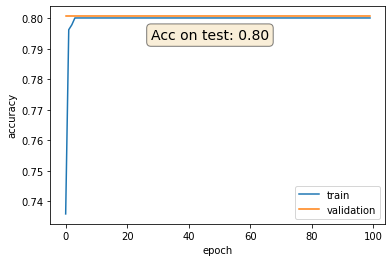

In [18]:
# ver um plot dos resultados de treino e teste 
# coloquei também o valor do teste, mas esse é só um ponto no final
# place a text box in upper left in axes coords
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.3, 0.90, "Acc on test: %.2f" % acc,  fontsize=14, transform=plt.axes().transAxes, 
        verticalalignment='top', bbox=props)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'])

plt.show()